In [1]:
import numpy as np
import pandas as pd
import pennylane as qml
from pennylane import numpy as npqml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
creditcard_data = pd.read_csv("fin_subset.csv")
creditcard_data.head()


step       customer  age gender zipcodeOri       merchant zipMerchant  \
0     0   'C583110837'  '3'    'M'    '28007'   'M480139044'     '28007'   
1     0  'C1332295774'  '3'    'M'    '28007'   'M480139044'     '28007'   
2     0  'C1160421902'  '3'    'M'    '28007'   'M857378720'     '28007'   
3     0   'C966214713'  '3'    'M'    '28007'   'M857378720'     '28007'   
4     0  'C1450140987'  '4'    'F'    '28007'  'M1198415165'     '28007'   

                 category  amount  fraud  
0             'es_health'   44.26      1  
1             'es_health'  324.50      1  
2      'es_hotelservices'  176.32      1  
3      'es_hotelservices'  337.41      1  
4  'es_wellnessandbeauty'  220.11      1

In [ ]:
#data analysis
import matplotlib.pyplot as plt
fraudulent = creditcard_data[creditcard_data["fraud"] == 1]  # Select fraudulent transactions
non_fraudulent = creditcard_data[creditcard_data["fraud"] == 0]  # Select non-fraudulent transactions

# Extract the amount column (adjust column name if different)
fraud_amount = fraudulent["amount"]
non_fraud_amount = non_fraudulent["amount"]

# Generate histograms
plt.figure(figsize=(10, 6))  # Set figure size

# Plot fraudulent transactions in red
plt.hist(fraud_amount, bins=50, alpha=0.7, color="red", label="Fraudulent")

# Plot non-fraudulent transactions in blue
plt.hist(non_fraud_amount, bins=50, alpha=0.7, color="blue", label="Non-Fraudulent")

# Add labels and title
plt.xlabel("Transaction Amount")
plt.ylabel("Number of Transactions")
plt.title("Distribution of Transaction Amounts (Fraudulent vs. Non-Fraudulent)")

plt.xlim(0, 1000)  # Set x-axis limits
plt.ylim(0, 10000)

# Add legend
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
# Group data by age and gender
grouped_data = creditcard_data.groupby(['age', 'gender'])
# Count number of fraudulent transactions for each group
fraud_counts = grouped_data['fraud'].sum()

# Create a bar chart
plt.bar(fraud_counts.index.get_level_values('age'), fraud_counts.values, color=['blue', 'red'])
plt.xlabel('Age')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Fraudulent Transactions by Age and Gender')
plt.legend(['Female', 'Male','UK'])
plt.show()


In [2]:
# Encode categorical features (age gender and category) using LabelEncoder
le_gender = LabelEncoder()
le_category = LabelEncoder()
le_age= LabelEncoder()
creditcard_data['gender_encoded'] = le_gender.fit_transform(creditcard_data['gender'])
creditcard_data['category_encoded'] = le_category.fit_transform(creditcard_data['category'])
creditcard_data['age_encoded'] = le_age.fit_transform(creditcard_data['age'])

# Prepare features and labels
X = creditcard_data[['step', 'age_encoded', 'amount', 'gender_encoded', 'category_encoded']]
y = creditcard_data['fraud']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd


# Step 4: Train the Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [5]:
# Step 5: Evaluate the Model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)


metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
metrics_df = pd.DataFrame([metrics])

metrics_df.to_csv('final_result.csv', index=False)

Accuracy: 0.9585798816568047
Precision: 1.0
Recall: 0.8
F1 Score: 0.8888888888888888


In [6]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predictions, zero_division=0.0)
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       134
           1       1.00      0.80      0.89        35

    accuracy                           0.96       169
   macro avg       0.98      0.90      0.93       169
weighted avg       0.96      0.96      0.96       169



In [7]:
from qiskit import Aer
from qiskit.circuit import ParameterVector, QuantumCircuit
from qiskit.utils import QuantumInstance
from qiskit_machine_learning.algorithms import VQC
# from qiskit_machine_learning.kernels import QuantumKernel
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from qiskit.algorithms.optimizers import COBYLA

C:\Users\gurpr\AppData\Local\Temp\ipykernel_19528\4025854037.py:8: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed in Qiskit 1.0. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import COBYLA


In [8]:
X = creditcard_data[['step', 'age_encoded', 'amount', 'gender_encoded', 'category_encoded']]
y = creditcard_data['fraud']


In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce the dimensionality of the features to 2
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

In [10]:
from qiskit import Aer
from qiskit.circuit import Parameter, QuantumCircuit
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit.utils import QuantumInstance
from qiskit_machine_learning.algorithms import VQC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from qiskit.algorithms.optimizers import COBYLA
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


In [11]:
# Create a feature map using 5 qubits and a custom circuit
feature_dimension = 5 # number of features
feature_map = QuantumCircuit(feature_dimension)
params = ParameterVector('x', feature_dimension) # parameters for the circuit
for i in range(feature_dimension):
    # Apply a rotation gate based on the feature value
    feature_map.ry(params[i], i)
    # Apply a CX gate between adjacent qubits
    if i < feature_dimension - 1:
        feature_map.cx(i, i + 1)

# Create a list of circuits, one for each row of X_pca
circuits = []
for row in X_pca:
    # Assign the row values to the parameters
    circuit = feature_map.assign_parameters({params: row})
    # Append the circuit to the list
    circuits.append(circuit)


this code snippet constructs a quantum circuit (feature_map) with a specified number of qubits (features). It applies Y-rotation gates based on feature values and entangles adjacent qubits using CX gates. Finally, it creates a list of customized circuits for each data point in X_pca.

The Y-rotation gate (Ry) manipulates individual qubits by rotating their states around the Y-axis.
The controlled-X (CX) gate entangles qubits and allows conditional operations based on the state of the control qubit.

In [ ]:
for circuit in circuits:
    circuit.draw(output='mpl')
    


C:\Users\gurpr\AppData\Roaming\Python\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


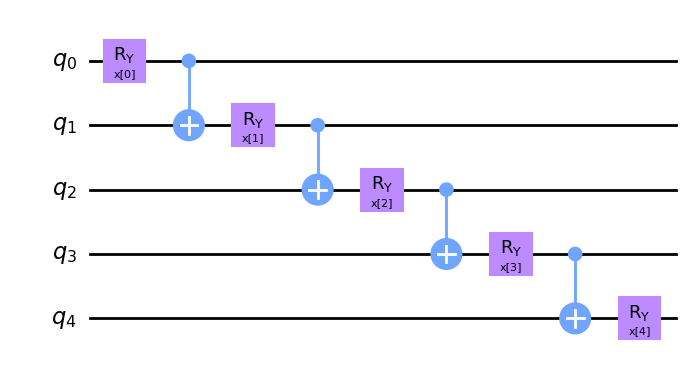

In [12]:
feature_map.draw(output='mpl')

In [13]:
# Create a quantum instance using the statevector simulator
backend = Aer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend)
optimizer = COBYLA(maxiter=500)
vqc = VQC(feature_map=feature_map,
          ansatz=RealAmplitudes(5, reps=3),
          optimizer=optimizer)



C:\Users\gurpr\AppData\Local\Temp\ipykernel_19528\3013886846.py:2: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  backend = Aer.get_backend('statevector_simulator')
C:\Users\gurpr\AppData\Local\Temp\ipykernel_19528\3013886846.py:3: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed in the Qiskit 1.0 release. For code migration guidelines, visit https://qisk.it/qi_migration.
  quantum_instance = QuantumInstance(backend)


In [15]:
# Train the VQC classifier on the credit card data
# X_pca = X_pca.to_numpy() # convert X_pca to a numpy array
y = y.to_numpy() # convert y to a numpy array
vqc.fit(X_pca, y)


In [16]:
# # Test the VQC classifier on some new data
# X_test = ... # load or generate some new data
# y_test = ... # load or generate the corresponding labels
# X_test_q=X_test[]
y_pred = vqc.predict(X_test) # predict the labels using the VQC classifier

In [17]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
metrics_df = pd.DataFrame([metrics])


Accuracy: 0.8520710059171598
Precision: 1.0
Recall: 0.2857142857142857
F1 Score: 0.4444444444444444


In [18]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, zero_division=0.0)
print(report)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       134
           1       1.00      0.29      0.44        35

    accuracy                           0.85       169
   macro avg       0.92      0.64      0.68       169
weighted avg       0.88      0.85      0.82       169

